In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from google.colab import drive


drive.mount('/content/drive')   # mount drive to load dataset from drive
batch_size = 64      # samples are fed in batches of this size per epoch
num_epochs = 20      # total no of epochs the model training is run for
learn_rate = 0.01    # learning rate η used in SGD to update weights
# num_classes = 10

Mounted at /content/drive


In [3]:
# Load Training Data
trData = loadmat('/content/drive/My Drive/DataSets/train_32x32.mat')
trX = np.array(trData['X'])
trY = np.array(trData['y'])

input_shape = trX.shape[1:]   # input image shape
num_classes = len(set(trY.flat))  # number of class labels

# Data Normalization and One-Hot Encoding of Training Data
trX = (trX - trX.min()) / (trX.max() - trX.min())
trY = to_categorical(trY, num_classes, dtype='int')

# Load Testing Data
tsData = loadmat('/content/drive/My Drive/DataSets/test_32x32.mat')
tsX = np.array(tsData['X'])
tsY = np.array(tsData['y'])

# Data Normalization and One-Hot Encoding of Testing Data 
tsX = (tsX - tsX.min()) / (tsX.max() - tsX.min())
tsY = to_categorical(tsY, num_classes, dtype='int')


In [4]:
# Building the network architecture
model = Sequential([
    Conv2D(filters=64, kernel_size=(5,5),           # Conv2D layer with 128 kernels (size: 5x5)
                 padding='same', activation='relu',  
                 input_shape=input_shape), 
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),   # MaxPooling2D layer (size: 2x2)
    Conv2D(filters=64, kernel_size=(5,5),           # Conv2D layer with 128 kernels (size: 5x5)
                 padding='same', activation='relu'), 
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),   # MaxPooling2D layer (size: 2x2)
    Conv2D(filters=128, kernel_size=(5,5),          # Conv2D layer with 128 kernels (size: 5x5)
                 padding='same', activation='relu'), 
    Flatten(),        # To change from image to vector input
    # Dropout(0.2),  
    Dense(3072, activation='relu'),       # Fully Connected layer with 3072 units
    # Dropout(0.2), 
    Dense(2048, activation='relu'),       # Fully Connected layer with 2048 units
    Dense(num_classes, activation='softmax')        # Output layer
])

In [5]:
# Setting Loss function and Optimization method
from tensorflow.keras import optimizers
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = optimizers.SGD(learning_rate = learn_rate), 
              metrics = ['accuracy'])

# model.summary()

# Training the network with Train Data and Testing its performance with Test Data
training = model.fit(trX, trY, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(tsX, tsY))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
1145/1145 [==============================] - 64s 29ms/step - loss: 2.2220 - accuracy: 0.1956 - val_loss: 2.1525 - val_accuracy: 0.2094
Epoch 2/20
1145/1145 [==============================] - 31s 27ms/step - loss: 1.4295 - accuracy: 0.5338 - val_loss: 0.7384 - val_accuracy: 0.7916
Epoch 3/20
1145/1145 [==============================] - 31s 27ms/step - loss: 0.6457 - accuracy: 0.8114 - val_loss: 0.6147 - val_accuracy: 0.8200
Epoch 4/20
1145/1145 [==============================] - 31s 27ms/step - loss: 0.5013 - accuracy: 0.8557 - val_loss: 0.4987 - val_accuracy: 0.8607
Epoch 5/20
1145/1145 [==============================] - 31s 27ms/step - loss: 0.4262 - accuracy: 0.8771 - val_loss: 0.4342 - val_accuracy: 0.8772
Epoch 6/20
1145/1145 [==============================] - 31s 27ms/step - loss: 0.3723 - accuracy: 0.8921 - val_loss: 0.4343 - val_accuracy: 0.8741
Epoch 7/20
1145/1145 [==============================] - 31s 27ms/step - loss: 0.3318 - accuracy: 0.9043 - val_loss: 0.4199 -

In [6]:
# Get training accuracy and loss
train_acc = training.history['accuracy']
val_acc = training.history['val_accuracy']

# Get testing accuracy and loss
train_loss = training.history['loss']
val_loss = training.history['val_loss']

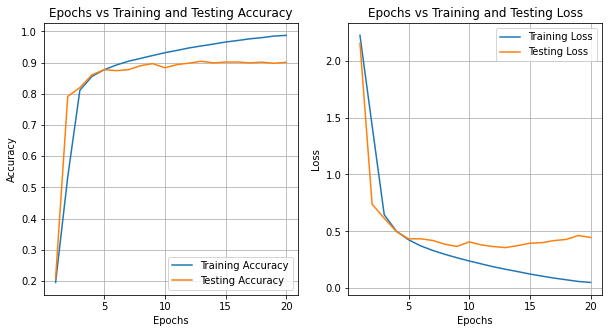

In [7]:
# Plot epochs vs. accuracy and loss graphs for both training and testing
plt.figure(figsize=(10, 5))

epochs_range = range(1, num_epochs+1)

# Accuracy Graphs
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Testing Accuracy')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Training and Testing Accuracy')

# Loss Graphs 
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Testing Loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Training and Testing Loss')

plt.show()

In [8]:
# Evaluate the network performance on Test Data and print loss, accuracy
test_loss, test_acc = model.evaluate(x=tsX, y=tsY, verbose=0)
print('Test loss is: {:0.4f} \nTest accuracy is: {:0.2f} %'.format(test_loss, test_acc*100))

Test loss is: 0.4464 
Test accuracy is: 90.09 %
